# Biomedical Image Analysis in Python

# libraries

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# import mplcursors
import scipy.ndimage as ndi
import pandas as pd

In [4]:
def show_image(image, title='Image'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
def plot_comparison(original,title_original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10), sharex=True,
    sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

# Exploration

## load DICOM image
- Reading images using the `ImageIO` package as it can read DICOM files, the standard format for human medical imaging. The data is read in as an image object(type of NumPy array).

In [6]:
# Load "chest-220.dcm"
im = imageio.imread("./dataset/tcia-chest-ct-sample/chest-220.dcm") 

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


## Metadata
- ImageIO loads available metadata into a dictionary, accessible through the meta attribute.
- Metadata can be quite rich in medical images and can include:
    - Patient demographics: name, age, sex, clinical information
    - Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

In [27]:
# Print the available metadata fields
# print(im.meta.keys())

 # for meta dict
print(im.meta)
df=pd.DataFrame.from_dict(im.meta,orient='index').transpose()

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('S

In [26]:
df

TransferSyntaxUID                SOPClassUID  \
0  1.2.840.10008.1.2  1.2.840.10008.5.1.4.1.1.2   

                                      SOPInstanceUID StudyDate SeriesDate  \
0  1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370...  20040529   20040515   

  ContentDate StudyTime SeriesTime ContentTime Modality  ...  \
0    20040515    115208     115254      115325       CT  ...   

           PixelSpacing BitsAllocated BitsStored HighBit PixelRepresentation  \
0  (0.976562, 0.976562)            16         16      15                   0   

  RescaleIntercept RescaleSlope  \
0          -1024.0          1.0   

                                           PixelData       shape  \
0  b'Data converted to numpy array, raw data remo...  (512, 512)   

               sampling  
0  (0.976562, 0.976562)  

[1 rows x 38 columns]

## plotting
- `vmin` and `vmax` from `plt.imshow()`: **control** the color **contrast** between values, Changing these can reduce the influence of extreme values.

(-0.5, 511.5, 511.5, -0.5)

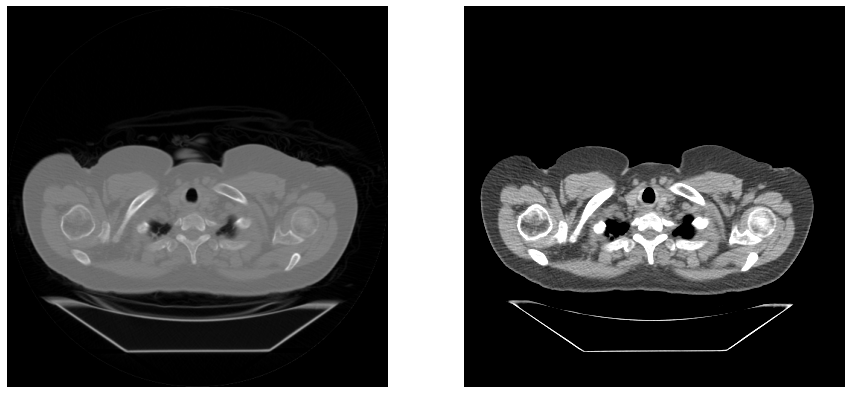

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(im, cmap='gray');
ax[0].axis('off')

# Draw the image with greater contrast
ax[1].imshow(im, cmap='gray', vmin=-200, vmax=200)
ax[1].axis('off')

# N-dimensional images

- **3D images**
    - cover a **volume of space** rather than just a single plane. This volumetric data is useful because it can better capture the complexities of the human body.

    - Color images RGB images.
    - time series data, include a temporal dimension, showing how each element changes over time. 

## Stack images
- **N-dimensional images are stacks of arrays**
    - Just as a 2D image is a stack of 1-dimensional vectors
    - 3D, 4D and even higher-dimensional images are stacks of simpler ones. 

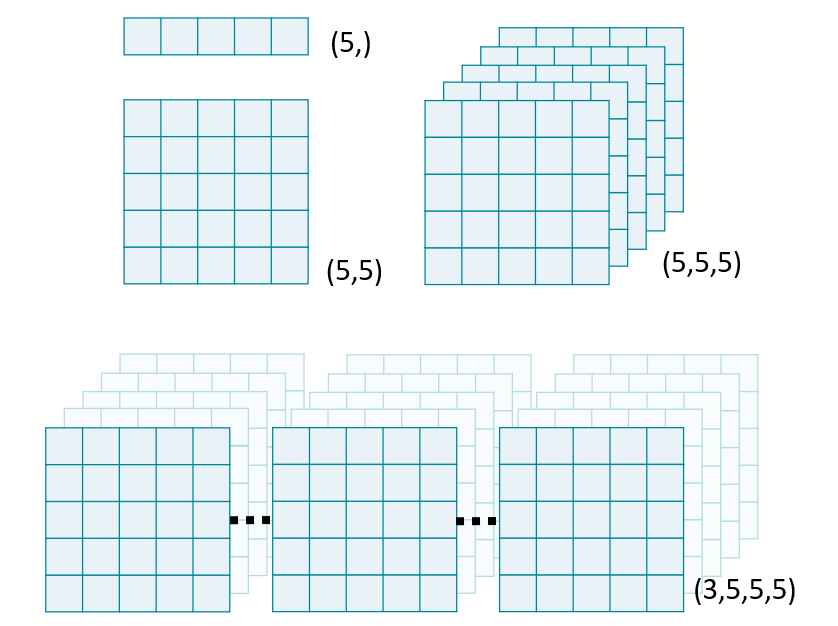

In [7]:
# Read in each 2D image
im1 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-220.dcm')
im2 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-221.dcm')
im3 = imageio.imread('./dataset/tcia-chest-ct-sample/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


## Load volumes

- ImageIO's `volread()` function can load multi-dimensional datasets and create 3D volumes from a folder of images.
- It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "./dataset/tcia-chest-ct-sample" folder, which contains 5 DICOM images.

In [8]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread('./dataset/tcia-chest-ct-sample/')

# Print image attributes
print('\n Available metadata:', vol.meta.keys())
print('\n Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)

 Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

 Shape of image array: (5, 512, 512)


# Field of view
- **Shape, sampling and field of view**
    When analyzing images, keep in mind that the data is only a representation of real, physical space. The information in your images is limited to the number of elements in it as the array shape 
    
    - **Image shape:** number of elements along each axis
    
    - **Sampling rate:**  The amount of physical space covered by each element and it can vary along each dimension. 
    
    - **Field of view:** the total amount of space covered along each axis. It is the product of the shape and sampling rate

> For DICOM images, the sampling rate is usually encoded in the metadata. For other types of image formats, such as JPEG and PNG, you may need to find it elsewhere.

- The field of view is the amount of physical space covered by an image , which is calculated from two properties:

    - Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
    - Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).

For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.

In [9]:
view= np.multiply(vol.shape, vol.meta['sampling'])
np.ceil(view)

array([ 17., 500., 500.])

# Advanced plotting

## Slice 3D images

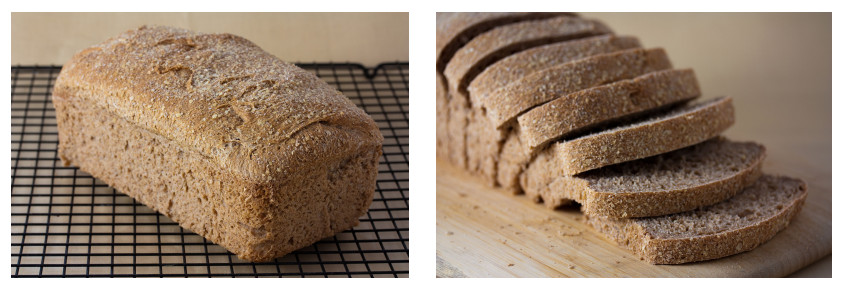

**To plot N-dimensional data slice it!**

Consider this loaf of bread - it’s a 3D volume that looks absolutely delicious. But what's inside the loaf? Is it bananas? Blueberries? Walnuts? This single 2D image cannot answer the question. Instead, you would have to slice it up and look at those pieces individually. The concept for 3D images is exactly the same: to explore your multidimensional array you must visualize many simpler slices of it.


When looking at human anatomy, these different views have special names: the axial, coronal, and sagittal planes. Knowing in which plane a dataset is stacked can help you navigate more efficiently.

> Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

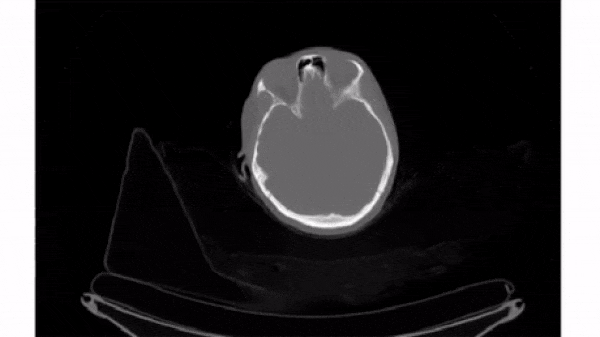

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


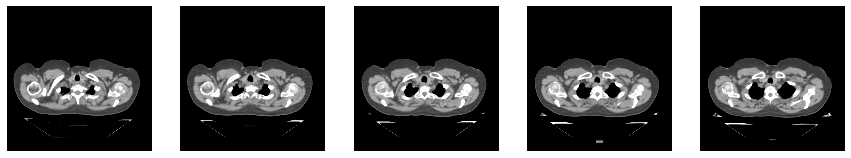

In [10]:
vol = imageio.volread('./dataset/tcia-chest-ct-sample/')

fig, ax = plt.subplots(1, 5, figsize=(15, 10))
# Loop through subplots and draw image
for i in range(5):
    im = vol[i, :, :]
    ax[i].imshow(im, cmap='gray', vmin=-200, vmax=200)
    ax[i].axis('off')

## Modifying the aspect ratio

- Many datasets do not have equal sampling rates across all dimensions.
- In these cases, you will want to stretch the pixels along one side to account for the differences.
- The amount of stretching needed is determined by the aspect ratio.
- To determine the aspect ratio, we first get the sampling rates along each dimension from the metadata dictionary.
- Then, we divide the sampling rate of the first dimension by the sampling rate of the second. When we call imshow(), we pass this ratio to the aspect argument.

d0, d1, d2= 3.269999999999996 0.976562 0.976562
aspect ratio=  3.3484817144226335


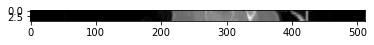

In [11]:
im = vol[:,:,100]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
print ('d0, d1, d2=',d0, d1, d2)

asp = d0 / d1
print ('aspect ratio= ',asp)

# Plot the images on a subplots array
plt.imshow(im, cmap='gray',aspect=asp)
plt.show()

# Image intensities

- The building blocks of medical images are Pixels and voxels
    - Pixel: 2D picture elements
    - Voxel: 3D volume elements

Data type: uint8
Min value: 3
Max value: 224


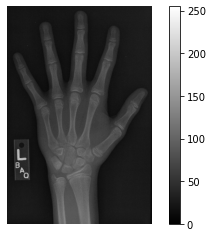

In [64]:
# Load the hand radiograph
im = imageio.imread("./dataset/hand.png" )
print('Data type:', im.dtype)
print('Min value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255);
plt.colorbar()
plt.axis('off');

## Histogram
- Histograms summarize the distribution of intensity values in an image.
- Count number of pixels at each intensity value

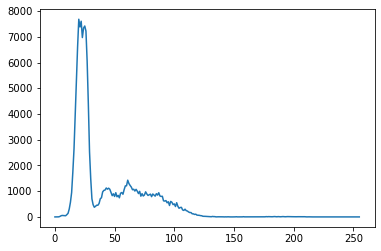

In [19]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Create a histogram, binned at each possible value
hist =ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() /  hist.sum()

# Plot the histogram 

plt.plot(hist, label='Histogram')

plt.show()

## Equalization

- Distributions in medical images often skewed toward low intensity (background values)
- Redistribute values to optimize full intensity range
- We can perform equalization with the aid of the cumulative distribution function.


- **CDF**
    - The area under a histogram is called the cumulative distribution function.
    - It measures the frequency with which a given range of pixel intensities occurs.
    - we calculate CDF by taking the rolling sum of the histogram and dividing it by the total number of pixels.
    - Here, we can see that about half the pixels have values less than 27.

> For biomedical applications, global equalization, such as this, should be done with caution, but the principle of redistributing intensity values is a useful one to keep in mind.

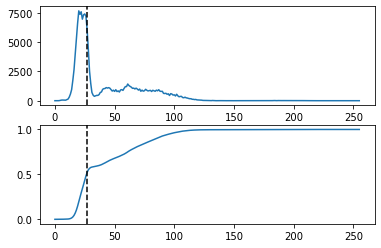

In [24]:
# Create a cumulative distribution function
cdf = hist.cumsum() /  hist.sum()
xv=np.where(cdf.round(1)==0.5)[0][-1] # pixel value at which 0.5

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1);
axes[0].plot(hist, label='Histogram')
axes[0].axvline(x=27, color='k', linestyle='--')

axes[1].plot(cdf, label='CDF')
axes[1].axvline(x=27, color='k', linestyle='--')

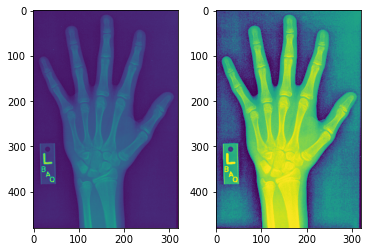

In [15]:
im_equalized = cdf[im] * 255
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im)
axes[1].imshow(im_equalized)
plt.show()

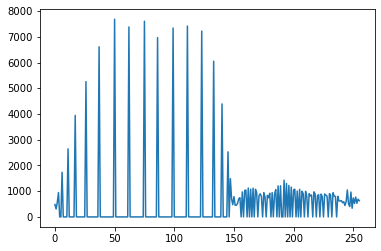

In [27]:

# Create a histogram, binned at each possible value
hist =ndi.histogram(im_equalized, min=0, max=255, bins=256)



plt.plot(hist, label='Histogram')

plt.show()

# Masks

- You can restrict your analysis to only the most important parts of an image by creating and applying image masks.
- A mask is a Boolean array which serves as a screen to remove undesirable pixels. Masks must retain the same dimensions as the original image so that the two can be overlaid.

- They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.


- For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

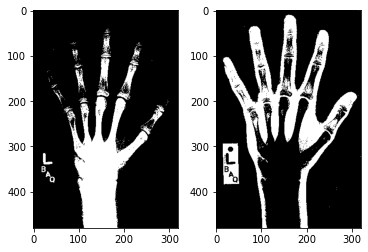

In [44]:
# Create skin and bone masks
mask_bone = im  >= 72
mask_skin = (im >=35) & (im <72)

# Plot the skin and bone masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_skin, cmap='gray')
# format_and_render_plot()

## Apply a mask

- Although masks are binary, they can be applied to images to filter out pixels where the mask is False.
- NumPy's where() function is a flexible way of applying masks. It takes three arguments:
`np.where(condition, x, y)`

- condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.


- Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im).

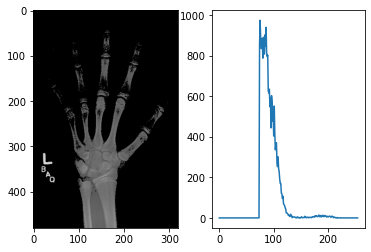

In [49]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im >=75
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist =ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(1,2)
axes[0].imshow(im_bone,cmap='gray')
axes[1].plot(hist)
# format_and_render_plot()

## Tune a mask

- Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

    - `binary_dilation`: Add pixels along edges
    - `binary_erosion`: Remove pixels along edges
    - `binary_opening`: Erode then dilate, "opening" areas near edges
    - `binary_closing`: Dilate then erode, "filling in" holes


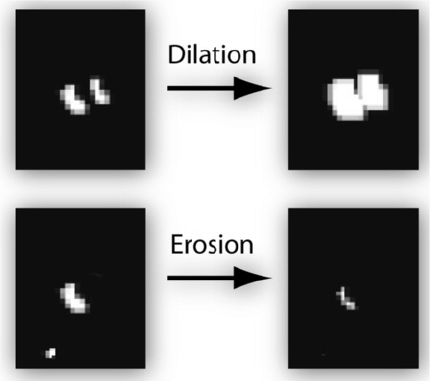

For this exercise, create a bone mask then tune it to include additional pixels.

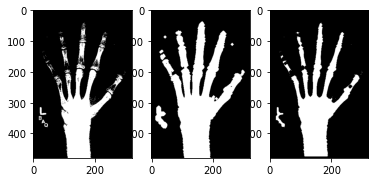

In [51]:
mask_bone = im >= 72
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')

# Filter convolutions

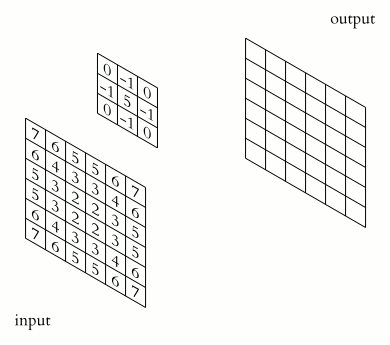

- Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.  

- Two common examples of filtering are smoothing and sharpening.
- Smoothing emphasizes large intensity patterns in an image by reducing variability between neighboring pixels. Essentially, it suppresses noise by blurring the image.
- Image sharpening ,  sharp changes are enhanced, exaggerating the differences between pixels. 
- applying custom filters using the convolve() function. 
- Filtering can also employ functions other than convolutional kernels, such as the mean, median, and maximum. SciPy has several of these functions built-in:
    - ndi.maximum_filter(im, size=3)
    - ndi.uniform_filter(im, size=3)
    - ndi.percentile_filter(im, 60, size=3)
    - ndi.median_filter(im, size=3)

For this exercise, smooth the hand radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.

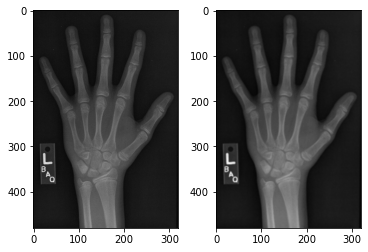

In [52]:
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')

## Gaussian filtering (Smoothing)

- the Gaussian filter is useful for smoothing data across larger areas.
- The Gaussian filter is excellent with a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.
- Applying a Gaussian filter can be a great way to reduce noise, but with very large sigma values, you'll lose a lot of detail in your image.

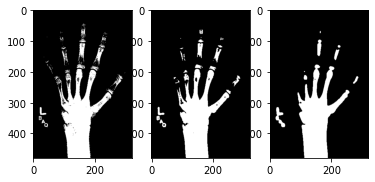

In [61]:
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im >=75, cmap='gray')
axes[1].imshow(im_s1 >=75, cmap='gray')
axes[2].imshow(im_s3 >=75, cmap='gray')

## Feature detection

Filters aren't just useful for blurring and smoothing. They can also be used as detectors for features of interest, such as edges.
2. Edges: sharp changes in intensity

If we want to construct a filter kernel that will emphasize edges, what should it look like? Recall that when we perform convolution, it creates a new image that reflects what the filter looks like: a smoothing filter itself has a smooth gradient, whereas a sharpening filter has a sudden change in intensity. An edge is a change in intensity along an axis. Sharp edges, for example, between the skull and background in this MRI image, have very high contrast. The filter should reflect this.
3. Edge detection

Let's see if we can make this work. We start by loading the foot x-ray. Next, we construct our kernel: to look for areas that have a change in intensity from top to bottom. We can weight the top row to positive 1 and the bottom row to negative 1. Essentially, this filter calculates the difference between the top and bottom rows, returning values far from 0 when there is a sudden change in intensity. Then, we convolve the image with the filter using SciPy. Plotting the image, it's clear that our detector has done a fine job of highlighting some edges. But note two things: First, this is a horizontal edge detector because it is looking for differences between the top and bottom values at each point. If you look at the vertical edges in the filtered image, you'll see that they have relatively low values compared to the top and bottom of the foot. Second, there are both positive and negative values. This happens because some edges have high-intensity values on top and low values on bottom, whereas others have the opposite. The direction of this difference determines whether the convolution yields a positive or negative value.
4. Sobel filters

There are many possible configurations for edge detectors. A very common one is the Sobel operator, which provides an extra weight to the center pixels of the kernel. The filter can be rotated to make it sensitive to either horizontal or vertical edges.
5. Sobel filters

Implementing the Sobel filter is just like implementing other filters: call ndimage dot sobel(), then pass in the image and the orientation of the filter.
6. Sobel filter magnitude

To remedy the fact that we have multiple edge maps with positive and negative values, we can create a composite edge map. Recall the Pythagorean Theorem - when you have two perpendicular vectors, you can calculate their distance by taking the root of their squares. This is useful in our situation: if we apply the Sobel filter along the first and second axes, we can then use these as input to the Pythagorean Theorem to get a composite, positively weighted edge image. This nicely highlights intensity changes in our image, and we can use these features for masking or object detection in later analysis steps.
7. Let's practice!

Now that you've learned the basics of edge detection give it a try yourself. 

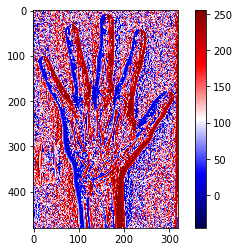

In [83]:
# Set weights to detect vertical edges
weights = [[1,0, -1],
           [1,0, -1],
           [1,0,-1]]

# Convolve "im" with filter weights
edges =ndi.convolve(im, weights)

# Draw the image in color

plt.imshow(edges, cmap='seismic', vmin=-45, vmax=255)
plt.colorbar();

In [90]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')   
    plt.tight_layout()
    plt.show()

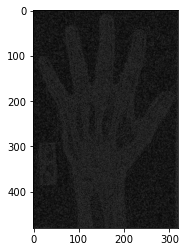

In [104]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 =  ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

# Plot edge magnitude
# plt.imshow(edges, cmap='gray', vmax=75)
b = np.array(edges, dtype=np.float64)
plt.imshow(b, cmap='gray', vmax=75)

# Segmentation (Objects and Labels)

- In this chapter, we'll discuss how you can measure one or more component parts of your image.
- Segmentation is the process of splitting an image into separate objects.
   
    
- **Labeling image components**
    - Our first step towards calculating the ejection fraction is to segment the left ventricle from the rest of the image.
    - For these MRI data, fluid-filled areas have high-intensity values. So, one approach is to take the original image, filter it to reduce noise and smooth edges.
    - then mask it to select pixels with relatively high values.
    - This does a good job of segmenting the left ventricle, but now we need to remove the pixels that are part of other objects.We can do this using SciPy's label() function.
    - First, we'll create the mask by applying a small Gaussian filter, then masking pixels with intensities lower than 150.
    - Next, we "label" the mask. The labeling algorithm treats 0 values as background pixels, and then it looks for all of the objects that are separated by background.
    - It then returns an array where each object has been indexed, as well as the number of objects detected.
    - It seems we have 14 distinct objects in this image.
    - Plotting the labels with the rainbow colormap shows that the circular left ventricle region in the center has been assigned a unique label value.

## Segment the heart

- **Sunnybrook Cardiac Database**
    - we will analyze cardiac MRI data from the Sunnybrook Cardiac Database. Each Sunnybrook dataset contains a 3D time series of a person's heart over the course of a single heartbeat.
    - The end goal is to measure:
        - the proportion of blood that's pumped out of the left ventricle (ejection fraction).
        - In this image, the left ventricle is the circular cavity in the center.
        - Abnormal ejection fractions can indicate urgent health issues.

In [4]:
im = imageio.imread('./dataset/sunnybrook-cardiac-mr/SCD2001_006/SCD2001_MR_117.dcm')

In [5]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt >60, 1, 0)     # binary 
mask = ndi.binary_closing(mask_start )       # true & false

# Label the objects in "mask"
labels, nlabels =ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 26


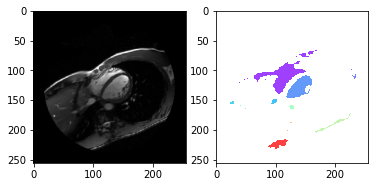

In [6]:
# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im,cmap='gray')
axes[1].imshow(overlay, cmap='rainbow', alpha=0.75)

## Selecting objects  
- **Label selection**

    - You can now select individual objects by referencing their index value.
    - To select pixels in the first object, you would use "where labels is 1, return the value from im, else return 0". Alternatively, you can select a number of labels meeting a condition. 
    - Calling "where labels is less than 3, return im, else 0" will select pixels from the first and second objects.


- **Object extraction**
    - A bounding box is the range of indices along each axis which completely enclose an object. You can use the bounding box to extract objects from the larger image.
    - When you run find_objects() on a labeled array, it will return a list of bounding boxes. Each item in the returned list is a tuple of index ranges - one slice for each dimension. Indexing the original image using one of these boxes will yield an image cropped to that object. You could then analyze each of these arrays individually.


- To select a particular object:
   - Find the label value associated with the object.
   - Create a mask of matching pixels.
 

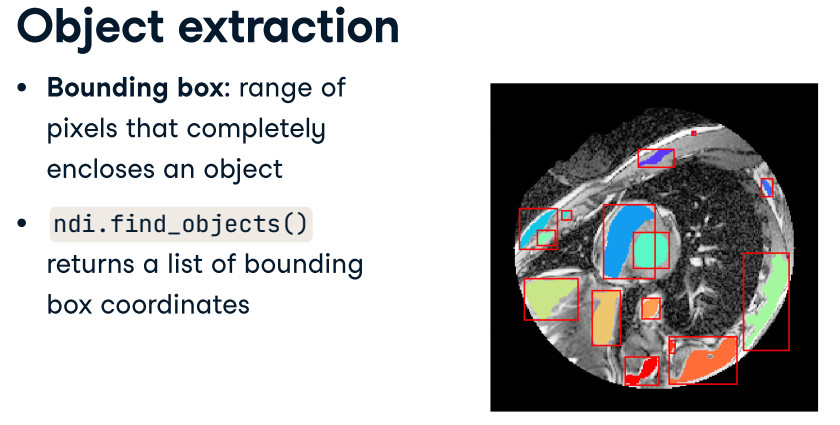

> For this exercise, create a labeled array from the provided mask. Then, find the label value for the centrally-located left ventricle, and create a mask for it.

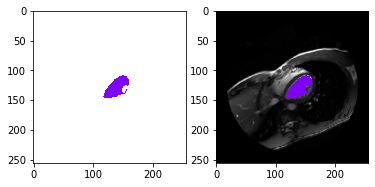

In [23]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]      #lv_val=5

lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
fig, axes = plt.subplots(1, 2)
axes[0].imshow(lv_mask, cmap='rainbow')

axes[1].imshow(im,cmap='gray')
axes[1].imshow(lv_mask, cmap='rainbow')

In [20]:
# Find bounding box of left ventricle
bboxes = ndi.find_objects(labels)

print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

Number of objects: 26
Indices for first box: (slice(64, 142, None), slice(19, 219, None))


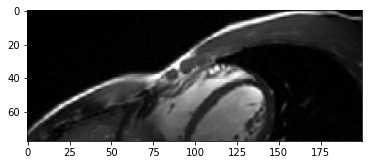

In [22]:
# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv,cmap='gray')

# Measuring Intensity

- Once objects have been segmented from the background, their properties can be efficiently measured using tools within `SciPy`.

- we'll step up to measuring a full three-dimensional volume.
- We have segmented this volume into two parts:
    - label 1 is the left ventricle, shown here in purple.
    - Label 2 is a circular section from the middle of the image, which will be useful for comparison.

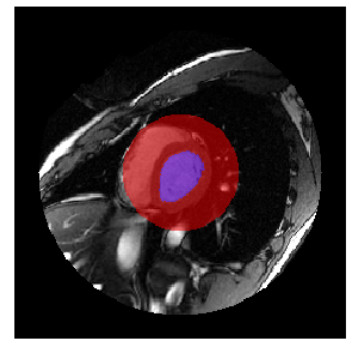

## measurement functions
- SciPy has optimized many of the most common descriptive functions for image data, including the mean, median, and standard deviation. 
- These functions summarize the array across all dimensions of an image, whether it be 2D, 3D, 4D, or more.
- They are especially useful when you have a labeled image because you can apply the function to every object independently with a single call.
- For custom calculations, you can also use the labeled_comprehension() function to summarize your data.

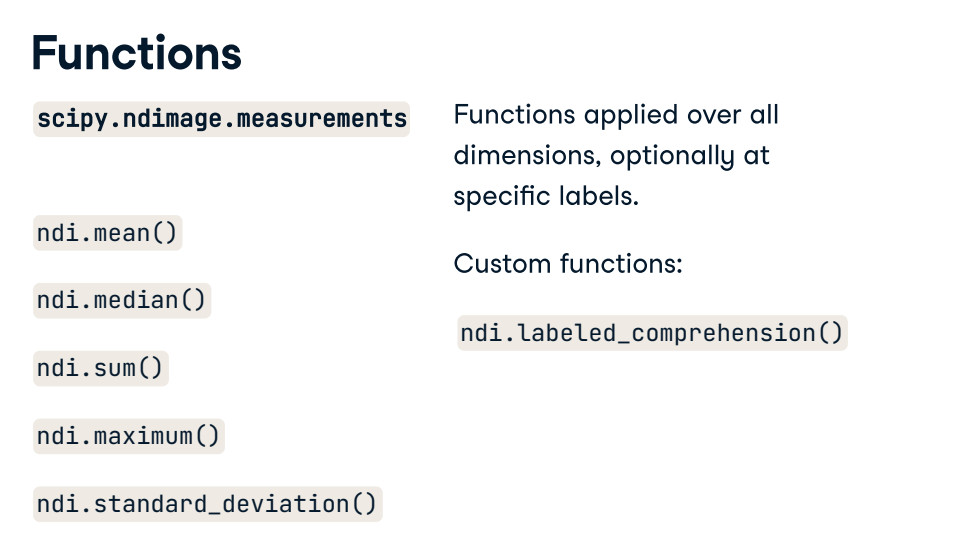

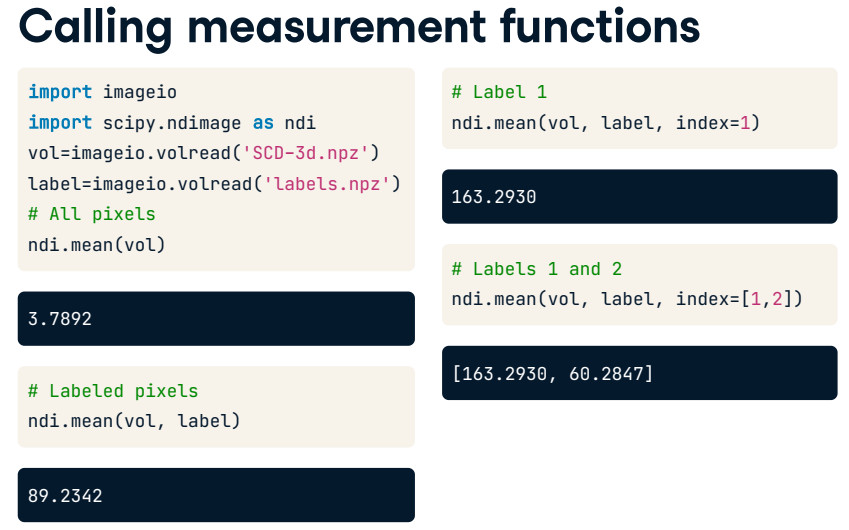

## Object histograms

- Plotting these object-level histograms is a great way to evaluate your segmentation.
- If you see very wide distributions or multiple peaks and valleys in your histogram, your labeled object may include many different tissue types.
- On the other hand, if the histogram resembles a normal distribution, your segmentation may be doing a good job.
- This is because the physical properties that influence intensity values should be relatively uniform throughout a tissue.
- For example, we expect that the voxels in our left ventricle label are filled with blood. Although we expect some variation in their intensity, we also expect them to be centered on some mean value. In this case, we can see that the majority of left ventricle intensity values are higher than the other labeled pixels. Although there are some low values, which are likely not part of the ventricle, the segmentation seems to do a good job overall.

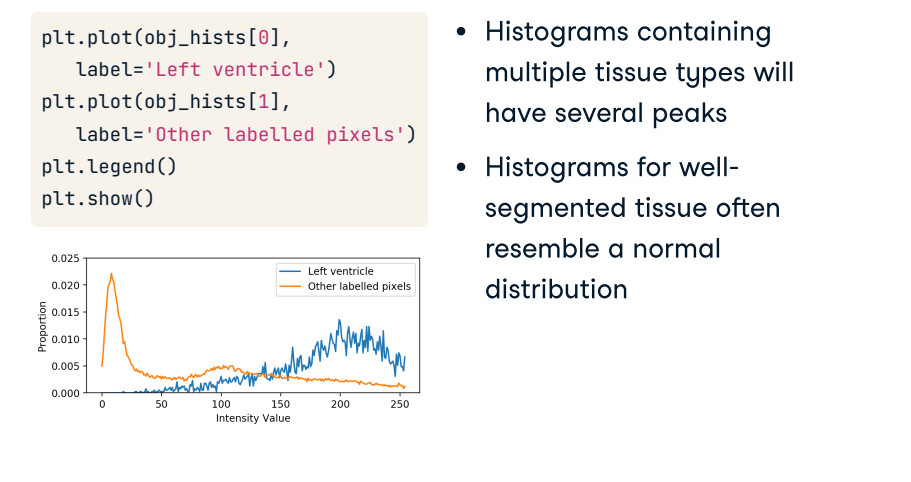

## Measure variance

SciPy measurement functions allow you to tailor measurements to specific sets of pixels:

    Specifying labels restricts the mask to non-zero pixels.
    Specifying index value(s) returns a measure for each label value.

For this exercise, calculate the intensity variance of vol with respect to different pixel sets. We have provided the 3D segmented image as labels: label 1 is the left ventricle and label 2 is a circular sample of tissue.

In [5]:
# vol=imageio.imread('./dataset/sunnybrook-cardiac-mr/SCD2001_006/SCD2001_MR_117.dcm')

In [ ]:
# # Variance for all pixels
# var_all = ndi.variance(vol)
# print('All pixels:', var_all)

# # Variance for labeled pixels
# var_labels = ndi.variance(vol, labels)
# print('Labeled pixels:', var_labels)

# # Variance for each object
# var_objects = ndi.variance(vol, labels, index=[1,2])
# print('Left ventricle:', var_objects[0])
# print('Other tissue:', var_objects[1])

In [ ]:
# <script.py> output:
#     All pixels: 840.4457526156154
#     Labeled pixels: 2166.5887761076724
#     Left ventricle: 1123.4641972021984
#     Other tissue: 1972.7151849347783

"All pixels" has the lowest variance because it has many pixels with 0 values.

## Separate histograms

- A poor tissue segmentation includes multiple tissue types, leading to a wide distribution of intensity values and more variance.

- On the other hand, a perfectly segmented left ventricle would contain only blood-related pixels, so the histogram of the segmented values should be roughly bell-shaped.

> For this exercise, compare the intensity distributions within vol for the listed sets of pixels. Use ndi.histogram, which also accepts labels and index arguments.

In [ ]:
# Create histograms for selected pixels
# hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
# hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
# hist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)

# # Plot the histogram density
# plt.plot(hist1 / hist1.sum(), label='All pixels')
# plt.plot(hist2/ hist2.sum(), label='All labeled pixels')
# plt.plot(hist3 / hist3.sum(), label='Left ventricle')

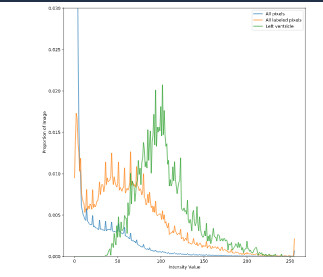

# Measuring morphology

- Measuring object "morphology," or shape and size, is another principal aim of image analysis.
- For example, if a patient goes in for an MRI and they find out they have a brain tumor, a natural first question might be: "How big is it?". Or, if they have been monitoring it for some time, they may want to know: "Has it grown?"
3. Spatial extent

To measure the amount of space occupied by an object, we need two quantities: the size of each element in the array and the number of those elements in the object. Let's calculate the volume of the left ventricle in one of our cardiac images. First, we establish the amount of real, physical space taken up by each voxel. Recall that in DICOM images, we can find this in the "sampling" field of the metadata dictionary. Multiplying the lengths of the first, second, and third dimensions will give us the total volume at each voxel. In this case, the measurements are in cubic millimeters. Next, we want to count the number of voxels in the left ventricle. We can do this by passing a 1 as input to ndimage dot sum() and then providing it with the labeled array and index of our object. The function will weight each left ventricle voxel with a value of 1 and sum them. Finally, we multiply the number of voxels by their individual size to get the total volume of the object.
4. Distance transformation

Another useful morphological measure is the distance of each voxel to the nearest background value. This information can help you identify the most embedded points within objects or mask out edge areas. To perform a distance transformation on a mask or label array, use the dist_transform_edt() function. This will return a new array, where each non-zero voxel has been replaced with the distance to the nearest background voxel. The maximum value, in this case, reflects how far from the edge the most embedded point is. If you have access to the sampling rates for each dimension, you can include these to generate values that reflect physical distance. You can see here that the max distance is reduced because the sampling rate is less than one millimeter per pixel.
5. Center of mass

A complementary measure is the center of mass, which you can calculate directly. Mass, in this case, refers to intensity values, with larger values pulling the center towards them. Just like with the intensity measures, the center_of_mass() function accepts "labels" and "index" arguments. The function returns a tuple of coordinates for each object specified. Forour cardiac data, the center of mass for the left ventricle corresponds to the center of the volume in all three dimensions.


In [7]:
vol = imageio.imread('./dataset/sunnybrook-cardiac-mr/SCD2001_006/SCD2001_MR_101.dcm')

In [ ]:
# Calculate volume per voxel
d0, d1 = vol.meta['sampling']
dvoxel = d0 * d1 
# Count label voxels
nvoxels=ndi.sum(1, label, index=1)
# Calculate volume of label
volume = nvoxels * dvoxel
volume

In [9]:
d0, d1 = vol.meta['sampling']

In [10]:
d0, d1

(1.367188, 1.367188)